# Численные методы решения обыкновенных дифференциальных уравнений. Методы Рунге–Кутты решения ОДУ


В этом ноутбуке будет решаться задача Коши вида $\dfrac{dy}{dx} = f(x, y)$, при начальных условиях $y(0) = y0$

In [177]:
import matplotlib.pyplot as plt
import numpy as np

## Метод Эйлера

Пусть дана задача Коши для уравнения первого порядка:
$
\frac{dy}{dx}=f(x,y),
$
$
y_{|_{x=x_0}}=y_0,
$
где функция $f$ определена на некоторой области $D\subset \mathbb{R}^2$. Решение ищется на полуинтервале $(x_0,b]$. На этом промежутке введём узлы:
$x_0<x_1<\dots<x_n\le b.$
Приближенное решение в узлах $x_i$, которое обозначим через $y_i$, определяется по формуле:
$
y_i=y_{i-1}+(x_i-x_{i-1})f(x_{i-1},y_{i-1}),\quad i=1,2,3,\dots,n.
$
Эти формулы непосредственно обобщаются на случай систем обыкновенных дифференциальных уравнений.

Таким образом, метод Эйлера является методом первого порядка — имеет погрешность на шаге $ O(h^2) $ и погрешность в целом $O(h)$.

In [74]:
def solve_euler(f, y0, x):
    """
    Решение оду вида dy/dx = f(x, y) методом Эйлера

    Args:
        f: функция (возможно многомерная)
        y0: начальное условие (соответствует числу x[0])
        x: сетка аргумента
    """

    n = len(x)

    if isinstance(y0, np.ndarray):
        y = np.zeros((n, len(y0)))
    else:
        y = np.zeros(n)
    y[0] = y0

    for i in range(n - 1):
        y[i + 1] = y[i] + (x[i + 1] - x[i]) * f(x[i], y[i])
    return y

## Средней точки (он же метод Эйлера с пересчётом или Метод Рунге-Кутта 2 порядка)

$\mathbf y_{n+1} =\mathbf y_{n}+h\frac{\mathbf f(x_n,\mathbf y_n)+\mathbf f(x_{n+1},\mathbf y_{n+1})}{2}$.

Для его реализации на каждом шаге необходимы как минимум две итерации (и два вычисления функции).

Прогноз:

$\tilde \mathbf y_{n+1}=\mathbf y_n+h\mathbf f(x_n,\mathbf y_n)$.

Коррекция:

$\mathbf y_{n+1}=\mathbf y_n+h\frac{\mathbf f(x_n,\mathbf y_n)+\mathbf f(x_{n+1},\tilde \mathbf y_{n+1})}{2}$.

Вторая формула — это простая итерация решения системы уравнений относительно $\mathbf y_{n+1}$, записанной в форме сжимающего отображения. Для повышения точности итерацию-коррекцию можно сделать несколько раз, подставляя $\tilde\mathbf y_{n+1}=\mathbf y_{n+1}$. Модифицированный метод Эйлера «с пересчётом» имеет второй порядок точности.

In [75]:
def solve_middle_point(f, y0, x):
    """
    Решение оду вида dy/dx = f(x, y) методом средней точки

    Args:
        f: функция (возможно многомерная)
        y0: начальное условие (соответствует числу x[0])
        x: сетка аргумента
    """

    n = len(x)

    if isinstance(y0, np.ndarray):
        y = np.zeros((n, len(y0)))
    else:
        y = np.zeros(n)

    y[0] = y0

    for i in range(n - 1):
        h = x[i + 1] - x[i]
        y[i + 1] = y[i] + h * f(x[i] + h / 2, y[i] + h / 2 * f(x[i], y[i]))
    return y

## Метод Рунге-Кутты 4 порядка

Метод Рунге—Кутты четвёртого порядка при вычислениях с постоянным шагом интегрирования столь широко распространён, что его часто называют просто методом Рунге—Кутты.

Рассмотрим задачу Коши для системы обыкновенных дифференциальных уравнений первого порядка. (Далее $ \mathbf y, \mathbf f,  \mathbf k_i \in \mathbb{R}^n$, а $ x, h \in \mathbb{R}^1 $).

$\textbf{y}'=\textbf{f}(x,\textbf{y}), \quad \textbf{y}(x_0)=\textbf{y}_0.$

Тогда приближенное значение в последующих точках вычисляется по итерационной формуле:

$ \textbf{y}_{n+1} = \textbf{y}_n + {h \over 6}(\textbf{k}_1 + 2\textbf{k}_2 + 2\textbf{k}_3 + \textbf{k}_4) $

Вычисление нового значения проходит в четыре стадии:

$ \textbf{k}_1 = \textbf{f} \left( x_n, \textbf{y}_n \right), $

$ \textbf{k}_2 = \textbf{f} \left( x_n + {h \over 2}, \textbf{y}_n + {h \over 2} \textbf{k}_1 \right), $

$ \textbf{k}_3 = \textbf{f} \left( x_n + {h \over 2}, \textbf{y}_n + {h \over 2} \textbf{k}_2 \right), $

$ \textbf{k}_4 = \textbf{f} \left( x_n + h, \textbf{y}_n + h\ \textbf{k}_3 \right). $
где $h$— величина шага сетки по $x$.

Этот метод имеет четвёртый порядок точности. Это значит, что ошибка на одном шаге имеет порядок $O(h^5)$, а суммарная ошибка на конечном интервале интегрирования имеет порядок $O(h^4)$ .

In [76]:
def solve_rk_4(f, y0, x):
    """
    Решение оду вида dy/dx = f(x, y) методом средней Рунге-Кутта 4 порядка

    Args:
        f: функция (возможно многомерная)
        y0: начальное условие (соответствует числу x[0])
        x: сетка аргумента
    """

    n = len(x)

    if isinstance(y0, np.ndarray):
        y = np.zeros((n, len(y0)))
    else:
        y = np.zeros(n)

    y[0] = y0

    for i in range(n - 1):
        h = x[i + 1] - x[i]
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + k1 * h / 2)
        k3 = f(x[i] + h / 2, y[i] + k2 * h / 2)
        k4 = f(x[i] + h, y[i] + k3 * h)
        y[i + 1] = y[i] + (h / 6.) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

## Наглядная демонстрация

In [115]:
def demonstrate_1d(f, y0, x, analytical_solution=None):
    figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

    for i, (solver, name) in enumerate((
            (solve_euler, 'Метод Эйлера'),
            (solve_middle_point, 'Метод средней точки'),
            (solve_rk_4, 'Метод Рунге-Кутта 4 порядка'),
    )):
        y = solver(f, y0, x)
        ax[i // 2, i % 2].plot(x, y)
        ax[i // 2, i % 2].set_title(name)

        if len(y.shape) != 1:
            ax[i // 2, i % 2].legend([f'$y_{k}$' for k in range(y.shape[-1])])

    if analytical_solution is not None:
        ax[1, 1].plot(x, analytical_solution(x))
        ax[1, 1].set_title('Аналитическое решение')

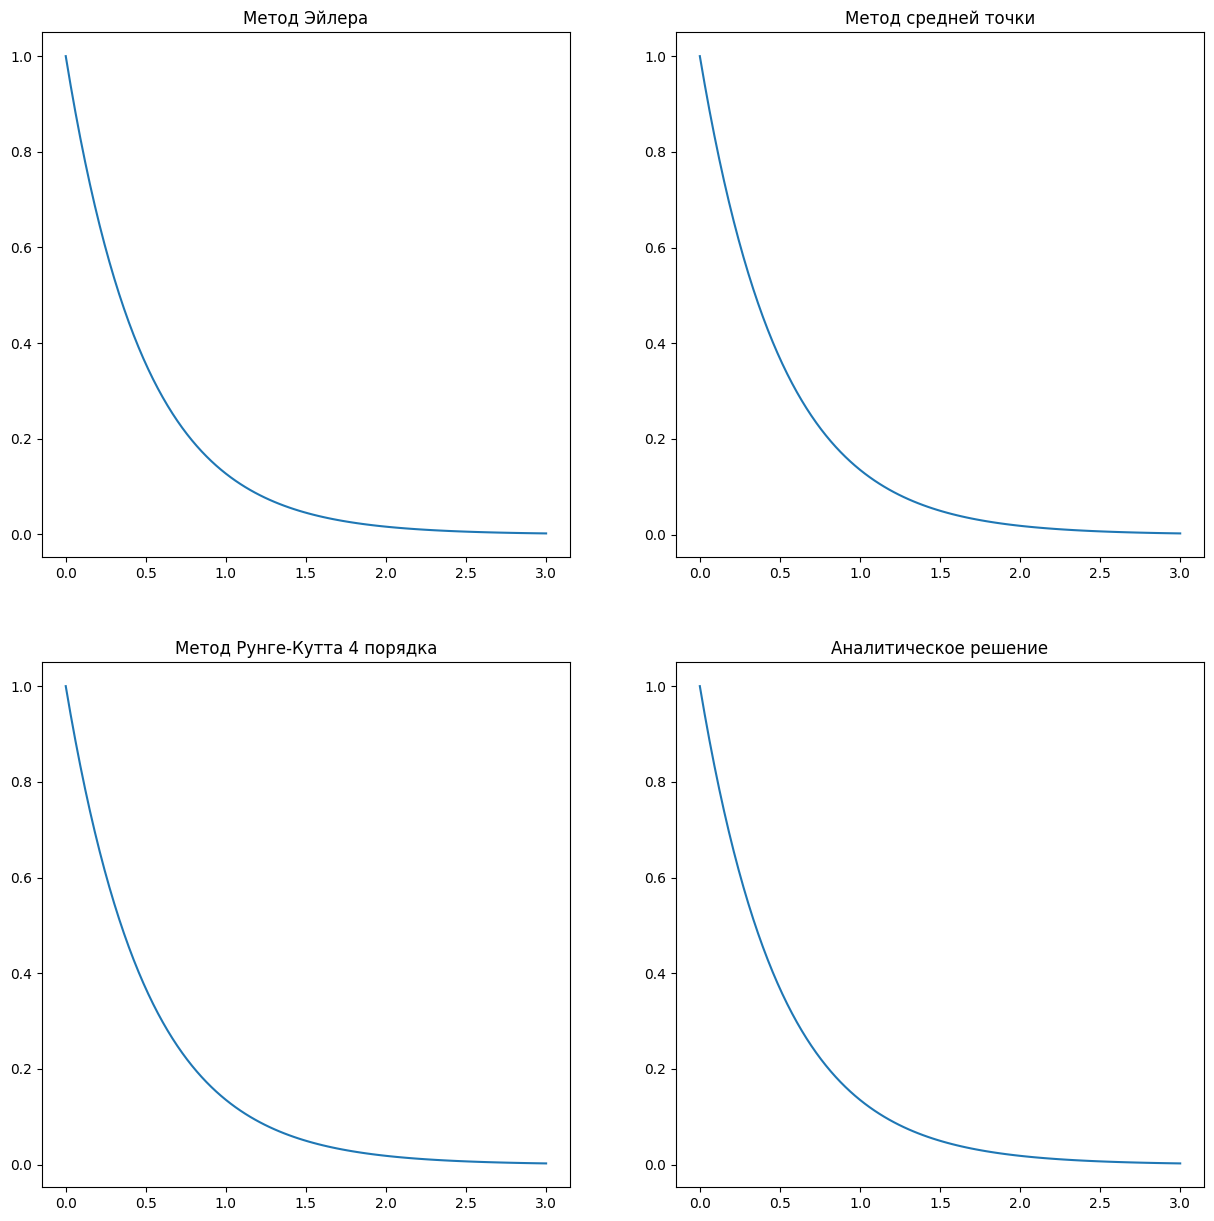

In [145]:
# затухающая экспонента
demonstrate_1d(lambda x, y: -2 * y, 1, np.linspace(0, 3, 100), analytical_solution=lambda x: np.exp(-2 * x))

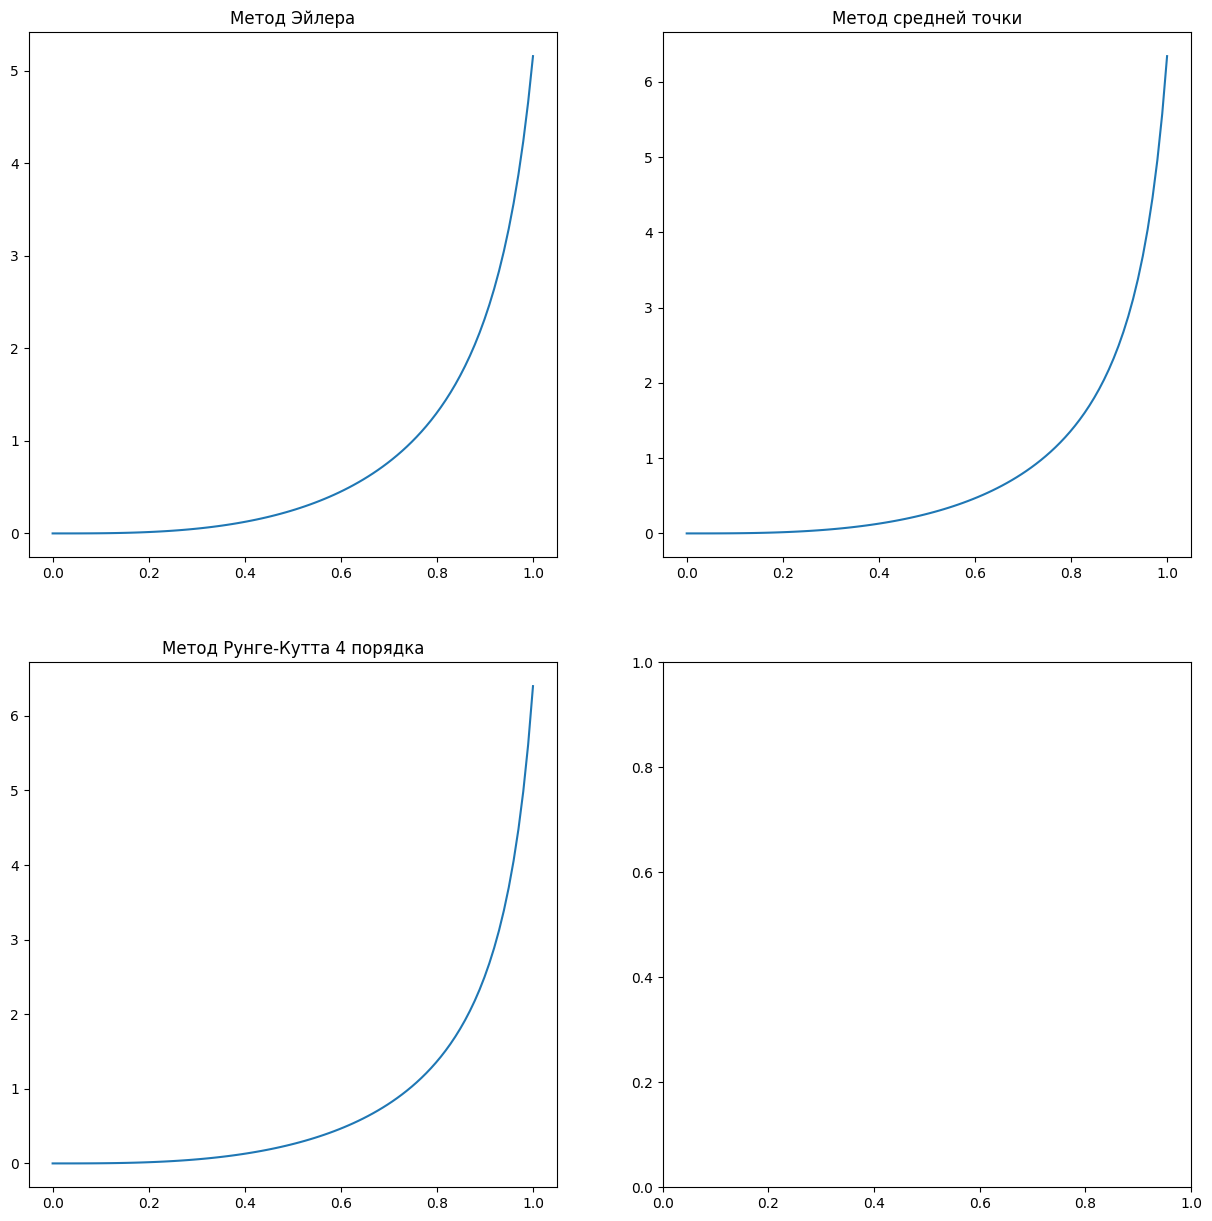

In [146]:
# рандомный полином
demonstrate_1d(lambda x, y: 6 * x * x + 2 * y * y, 0, np.linspace(0, 1, 100))

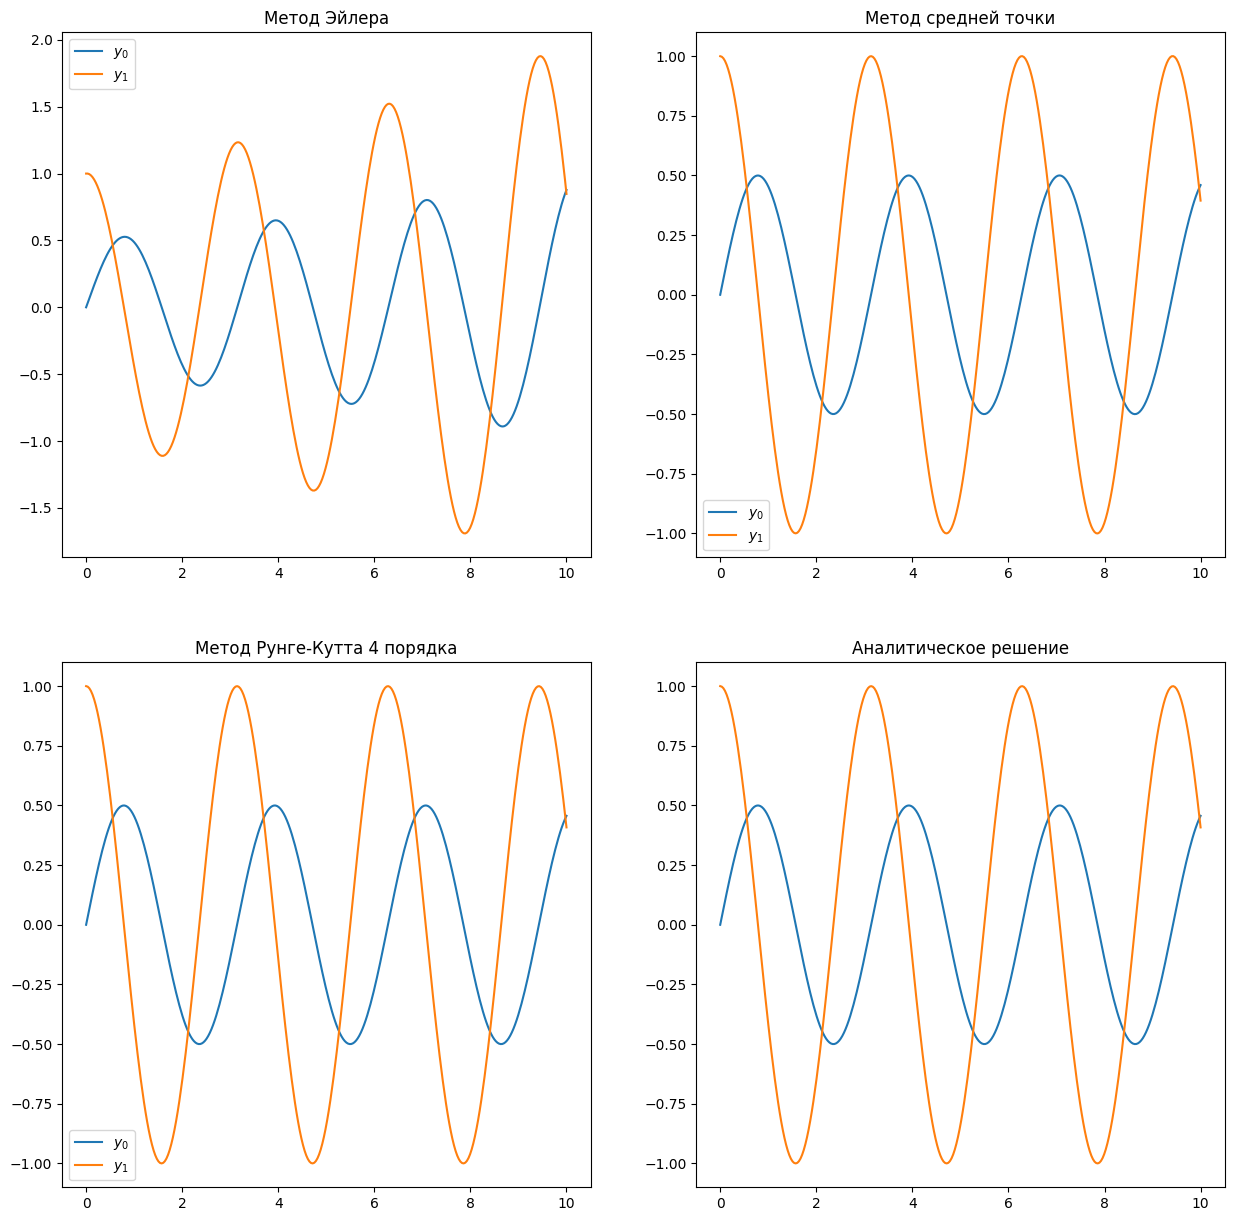

In [176]:
# Модель математического маятника

w = 2


def mm(x, y):
    return np.array([
        [0, 1],
        [-w * w, 0],
    ]) @ y


def mm_solution(x):
    return np.array([
        np.sin(w * x) / w,
        np.cos(w * x)
    ]).T


# y0 - значение функции, y1 - производная
demonstrate_1d(mm, np.array([0, 1]), np.linspace(0, 10, 300), analytical_solution=mm_solution)

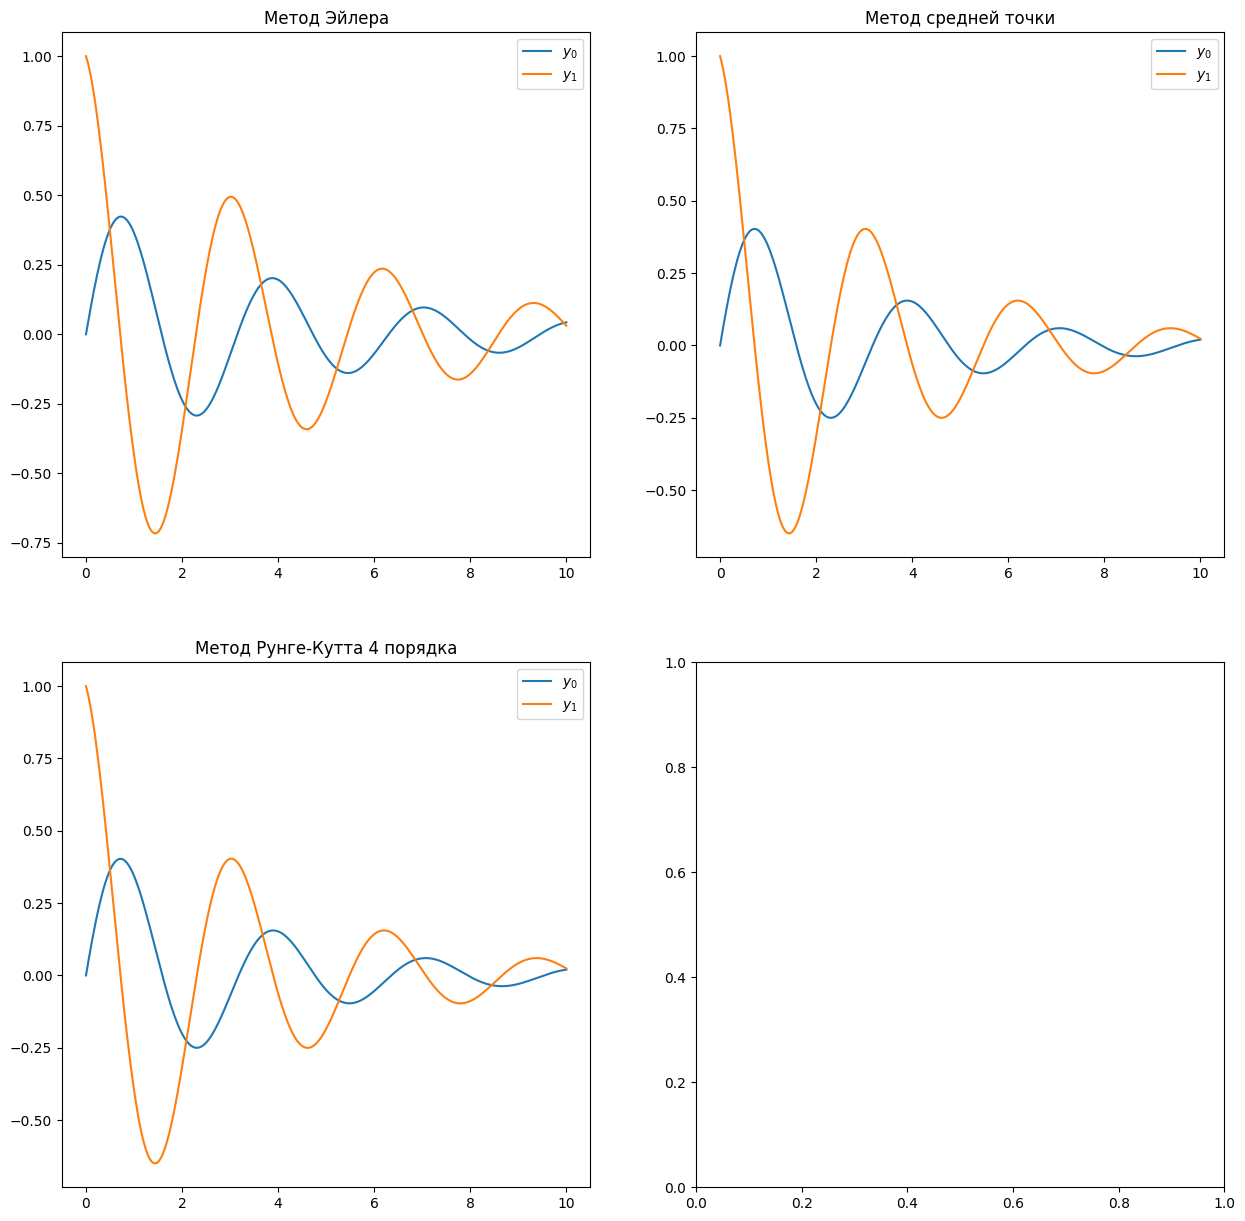

In [175]:
# Модель математического маятника с затуханием

w = 2
gamma = .3


def mm_fading(x, y):
    return np.array([
        [0, 1],
        [-w * w, -2 * gamma],
    ]) @ y


# y0 - значение функции, y1 - производная
demonstrate_1d(mm_fading, np.array([0, 1]), np.linspace(0, 10, 300))

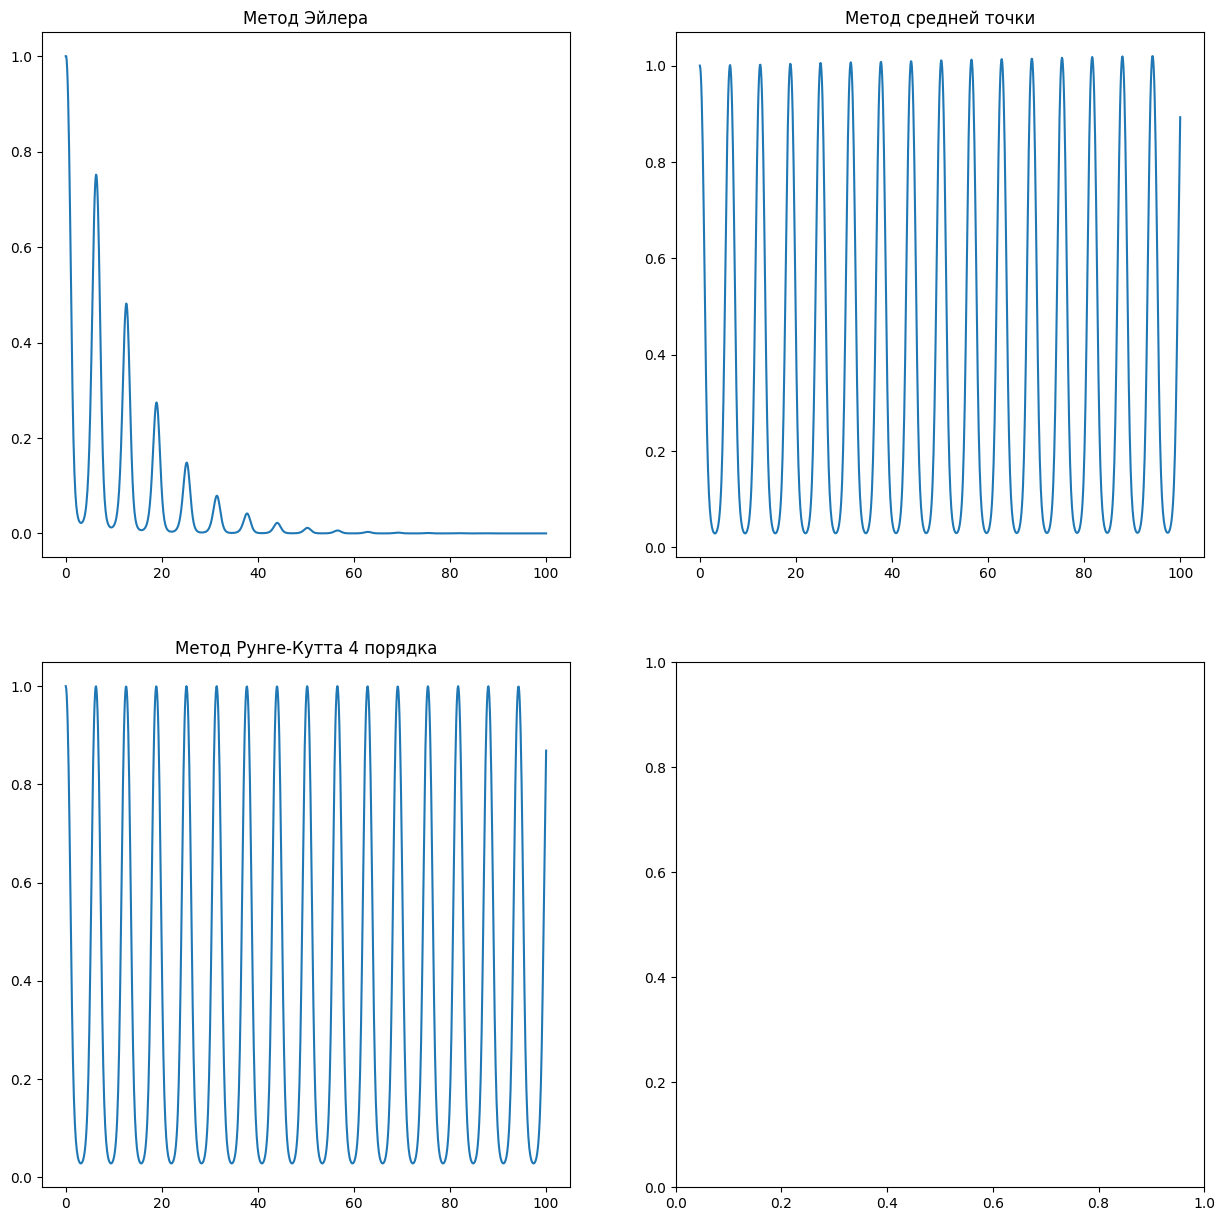

In [148]:
# Попытка сломать решение. Метод Эйлера сдался.
demonstrate_1d(lambda x, y: -np.sin(x) * np.sin(2 * y), 1, np.linspace(0, 100, 1000))

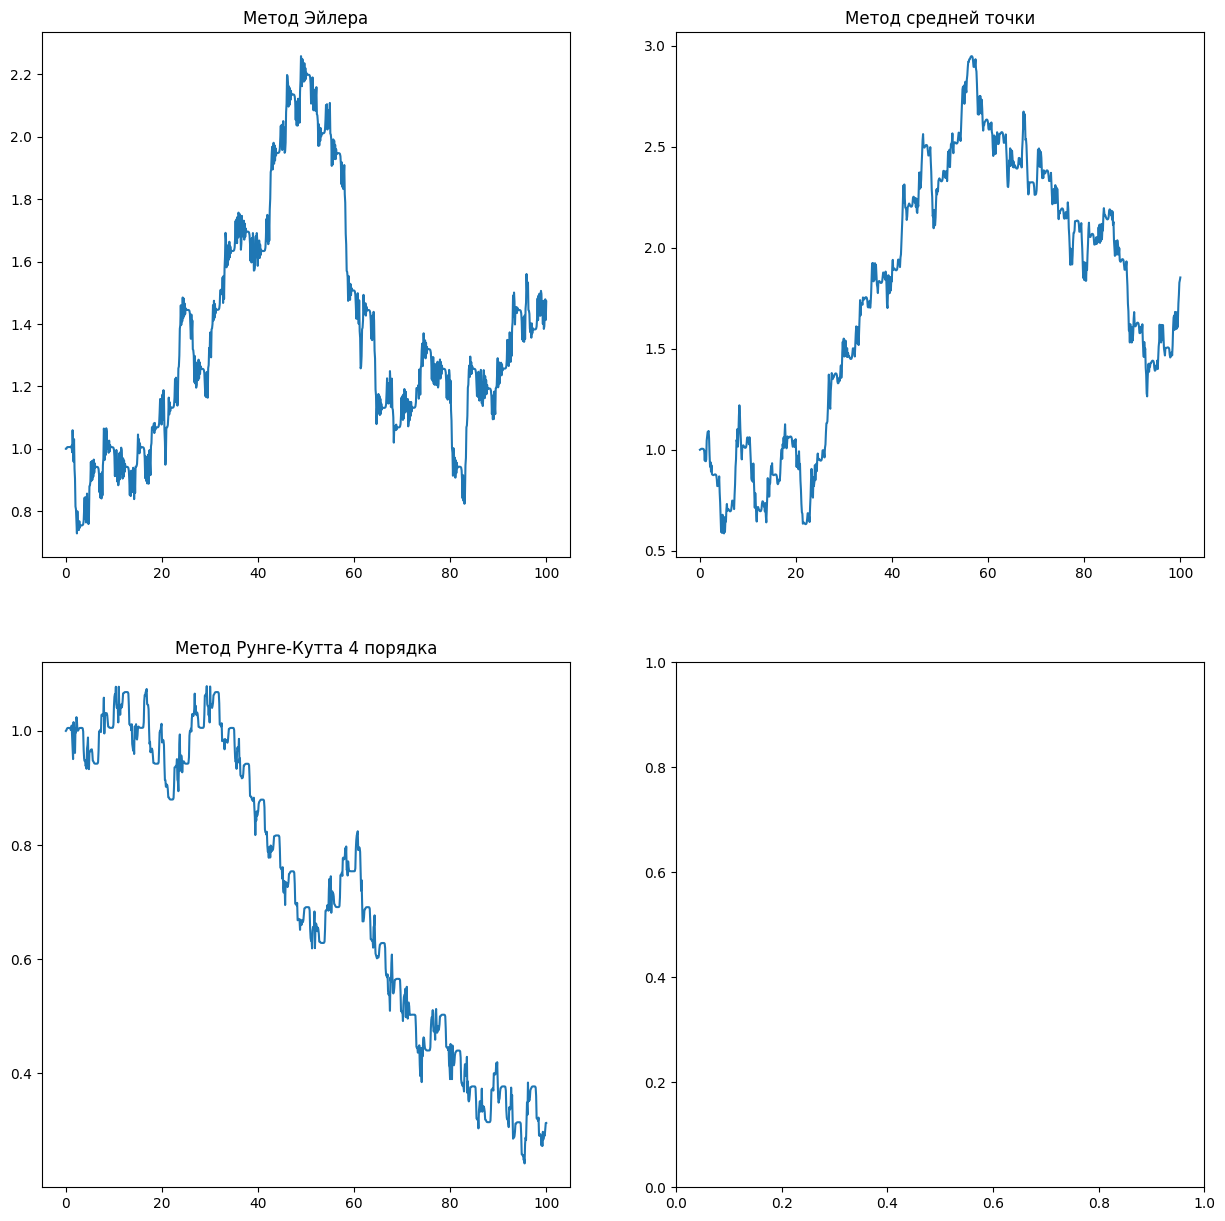

In [173]:
# Попытка сломать решение. Тут все методы выдали что-то невнятное
demonstrate_1d(lambda x, y: -np.sin(x) * np.sin(50 * y), 1, np.linspace(0, 100, 1000))

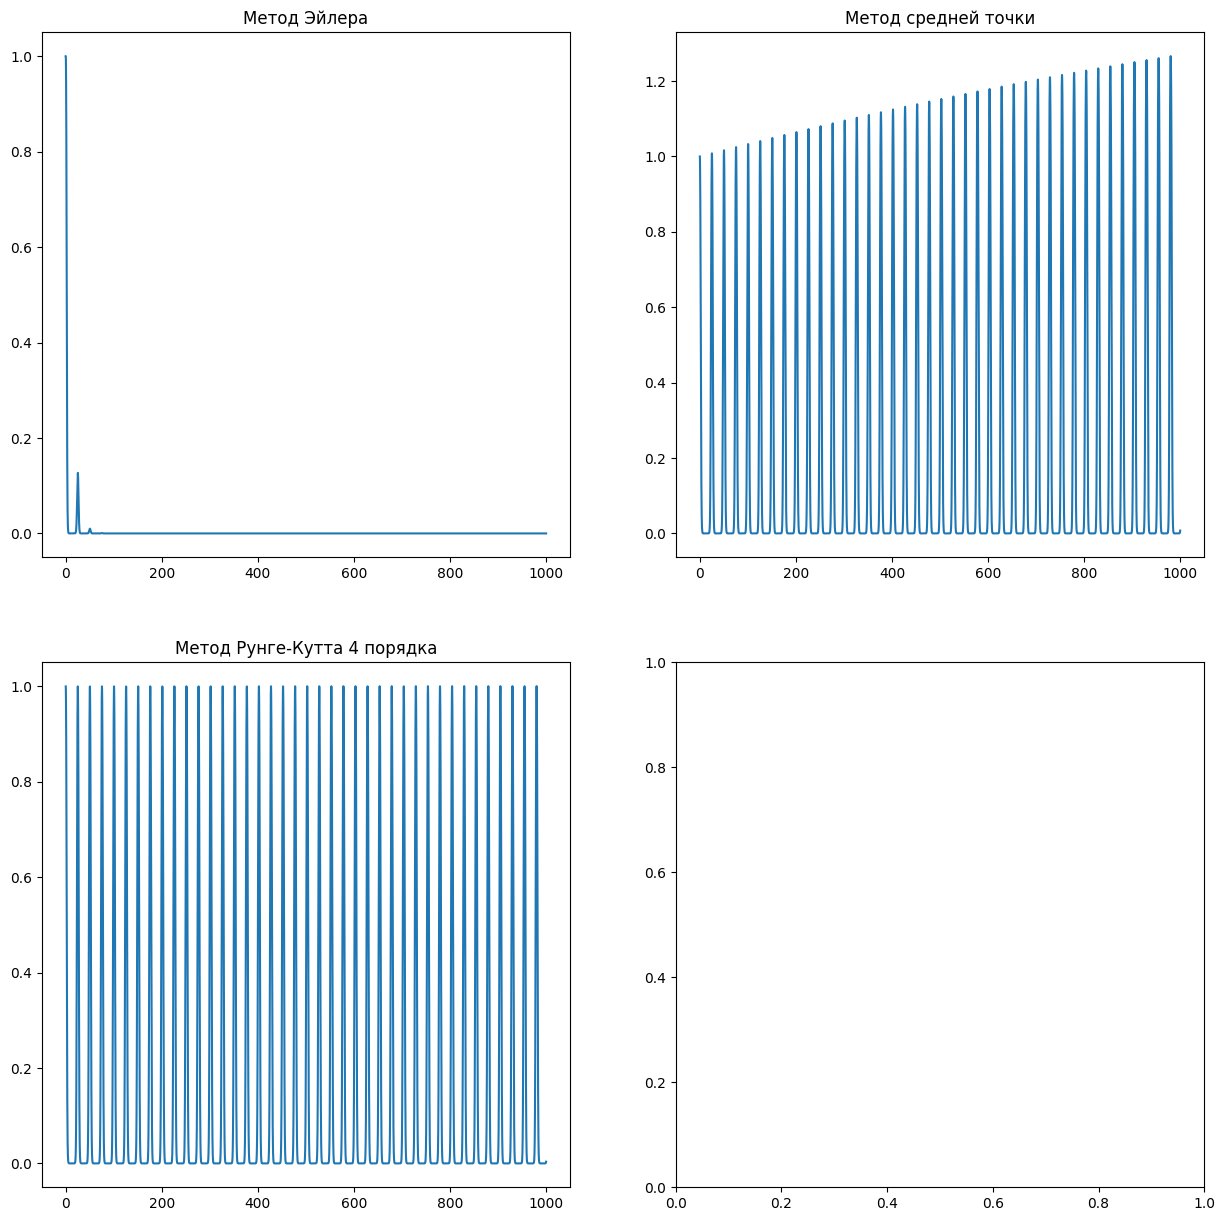

In [161]:
# Попытка сломать решение. Тут все методы выдали что-то невнятное
demonstrate_1d(lambda x, y: -np.sin(x / 4) * np.sin(2 * y), 1, np.linspace(0, 1000, 10000))

100%|██████████| 91/91 [00:03<00:00, 29.99it/s]


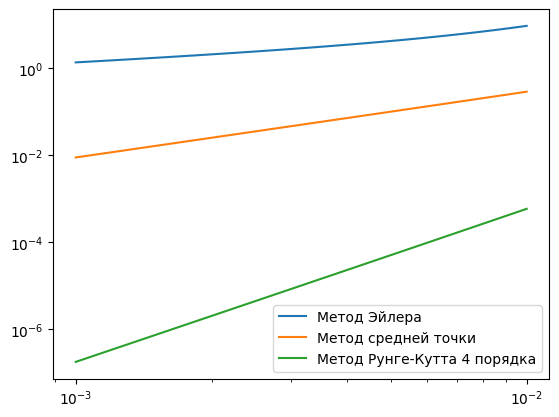

In [207]:
## Оценка погрешности

# Модель математического маятника

w = 2


def mm(x, y):
    return np.array([
        [0, 1],
        [-w * w, 0],
    ]) @ y


def mm_solution(x):
    return np.array([
        np.sin(w * x) / w,
        np.cos(w * x)
    ]).T


errors_euler = []
errors_middle_point = []
errors_rk_4 = []


start = 100
stop = 1001
step = 10
for n in trange(start, stop, step):
    x = np.linspace(0, 10, n)
    y_real = mm_solution(x)[:, 0]

    for solver, errors, name in (
            (solve_euler, errors_euler, 'Метод Эйлера'),
            (solve_middle_point, errors_middle_point, 'Метод средней точки'),
            (solve_rk_4, errors_rk_4, 'Метод Рунге-Кутта 4 порядка'),
    ):
        y_solved = solver(mm, np.array([0, 1]), x)[:, 0]
        delta = y_real - y_solved
        delta = np.sqrt(np.sum(delta * delta))
        errors.append(delta)


plt.plot(1 / np.arange(start, stop, step), errors_euler, label='Метод Эйлера')
plt.plot(1 / np.arange(start, stop, step), errors_middle_point, label='Метод средней точки')
plt.plot(1 / np.arange(start, stop, step), errors_rk_4, label='Метод Рунге-Кутта 4 порядка')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [213]:
euler_p = np.polyfit(np.log(1 / np.arange(start, stop, step)), np.log(errors_euler), 1)
middle_point_p = np.polyfit(np.log(1 / np.arange(start, stop, step)), np.log(errors_middle_point), 1)
rk4_p = np.polyfit(np.log(1 / np.arange(start, stop, step)), np.log(errors_rk_4), 1)

print(f'Точность метода Эйлера = {euler_p[0]}')
print(f'Точность метода средней точки = {middle_point_p[0]}')
print(f'Точность метода Рунге-Кутта 4 порядка = {rk4_p[0]}')

Точность метода Эйлера = 0.7583842382607627
Точность метода средней точки = 1.5080822539342387
Точность метода Рунге-Кутта 4 порядка = 3.514006008531186


## Выводы

Как оказалось, метода Эйлера достаточно легко сломать. Метод средней точки чуть сложнее. Метод Рунге-Кутта 4 порядка показал себя достойно. Так же оценка погрешностей почти совпала с точность метода

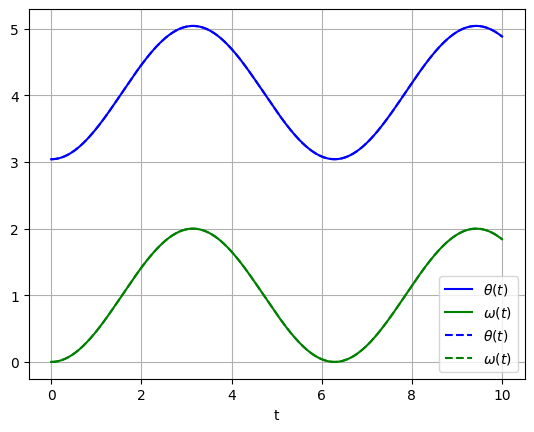

In [171]:
x = np.linspace(0, 10, 2000)
y0 = np.array([np.pi - 0.1, 0.0])

y = solve_euler(lambda x, y: np.sin(x), 0, y0, x)

plt.plot(x, y[:, 0], 'b', label=r'$\theta(t)$')
plt.plot(x, y[:, 1], 'g', label=r'$\omega(t)$')


y2 = solve_euler(lambda x, y: np.sin(x), 0, y0, x)

plt.plot(x, y2[:, 0], 'b', label=r'$\theta(t)$', linestyle='--')
plt.plot(x, y2[:, 1], 'g', label=r'$\omega(t)$', linestyle='--')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()